In [86]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### School Funding (Revenue) by State ###

In [87]:
rev_data = os.path.join('Stfis14_1a.csv')
rev_data_df = pd.read_csv(rev_data)
rev_data_df.head()

,SURVYEAR,FIPS,STABR,STNAME,R1A,R1B,R1C,R1D,R1E,R1F,...,A14B,PPE15,MEMBR13,ARRASTE1,ARRATE5,ARRAE81Z,ARRATE10,ARRASTE6,ARRATLEIZ,ARRASTE4
0,2014.0,1.0,AL,Alabama,-2.000000e+00,-2.0,1.128860e+09,621382410.0,6131559.0,1033208.0,...,706566.0,8767.0,746204.0,805460.0,1404270.0,17206.0,0.0,15000.0,107591.0,0.0
1,2014.0,2.0,AK,Alaska,-2.000000e+00,-2.0,2.952328e+08,161453827.0,142222.0,159692.0,...,-2.0,19699.0,130944.0,20946.0,46923.0,0.0,0.0,0.0,0.0,0.0
2,2014.0,4.0,AZ,Arizona,2.979309e+09,-2.0,-2.000000e+00,66772046.0,5748335.0,18493579.0,...,-2.0,7783.0,1102445.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014.0,5.0,AR,Arkansas,1.619649e+09,1223591.0,-2.000000e+00,11117198.0,10086128.0,2445184.0,...,-2.0,9946.0,489979.0,1175969.0,4031513.0,0.0,72883.0,0.0,0.0,0.0
4,2014.0,6.0,CA,California,1.840715e+10,933627693.0,1.684000e+05,-2.0,1117595.0,371734184.0,...,-2.0,9740.0,6312623.0,22075494.0,37624403.0,402380.0,166270.0,0.0,29240684.0,0.0


In [88]:
# filtering out the wanted data
rev_data_df = rev_data_df[["SURVYEAR", "STABR", "STNAME", "STR1", "R3", "STR4", "TR", "E11", "E11A"]]
rev_data_df.head()

,SURVYEAR,STABR,STNAME,STR1,R3,STR4,TR,E11,E11A
0,2014.0,AL,Alabama,2.479527e+09,4.065546e+09,8.386497e+08,7.396933e+09,2.495973e+09,1.775678e+09
1,2014.0,AK,Alaska,5.295957e+08,1.835601e+09,3.121618e+08,2.677359e+09,6.880018e+08,-1.000000e+00
2,2014.0,AZ,Arizona,3.899570e+09,4.217359e+09,1.203567e+09,9.594428e+09,3.039540e+09,2.013800e+09
3,2014.0,AR,Arkansas,1.872188e+09,2.665329e+09,5.922464e+08,5.133841e+09,1.818164e+09,1.170636e+09
4,2014.0,CA,California,2.310720e+10,3.929308e+10,6.942640e+09,6.934292e+10,2.388054e+10,1.707658e+10


In [92]:
# using csv file key to rename columns
renamed_df = rev_data_df.rename(columns={"SURVYEAR":"YEAR", "STABR":"ST", "STNAME":"STATE", 
                                         "STR1":"LOCAL REVENUES SUBTOTAL", 
                                        "R3":"STATE REVENUES", "STR4":"FEDERAL REVENUES SUBTOTAL", 
                                        "TR":"TOTAL REVENUES FROM ALL SOURCES", 
                                         "E11":"INSTRUCTIONAL EXPENDITURES SALARIES", 
                                        "E11A":"TEACHER SALARIES REGULAR PROGRAMS"})
renamed_df

,YEAR,ST,STATE,LOCAL REVENUES SUBTOTAL,STATE REVENUES,FEDERAL REVENUES SUBTOTAL,TOTAL REVENUES FROM ALL SOURCES,INSTRUCTIONAL EXPENDITURES SALARIES,TEACHER SALARIES REGULAR PROGRAMS
0,2014.0,AL,Alabama,2.479527e+09,4.065546e+09,8.386497e+08,7.396933e+09,2.495973e+09,1.775678e+09
1,2014.0,AK,Alaska,5.295957e+08,1.835601e+09,3.121618e+08,2.677359e+09,6.880018e+08,-1.000000e+00
2,2014.0,AZ,Arizona,3.899570e+09,4.217359e+09,1.203567e+09,9.594428e+09,3.039540e+09,2.013800e+09
3,2014.0,AR,Arkansas,1.872188e+09,2.665329e+09,5.922464e+08,5.133841e+09,1.818164e+09,1.170636e+09
4,2014.0,CA,California,2.310720e+10,3.929308e+10,6.942640e+09,6.934292e+10,2.388054e+10,1.707658e+10
5,2014.0,CO,Colorado,4.502485e+09,4.028316e+09,6.909918e+08,9.241449e+09,3.155520e+09,2.280640e+09
6,2014.0,CT,Connecticut,6.131700e+09,4.418595e+09,4.673971e+08,1.101769e+10,3.768384e+09,2.360365e+09
7,2014.0,DE,Delaware,6.206193e+08,1.169017e+09,1.803609e+08,1.969997e+09,6.868401e+08,4.490378e+08
8,2014.0,DC,District of Columbia,1.962183e+09,-2.000000e+00,2.071773e+08,2.169360e+09,5.932085e+08,4.295573e+08
9,2014.0,FL,Florida,1.225373e+10,1.046093e+10,3.182434e+09,2.589709e+10,8.956541e+09,5.518188e+09


/Users/abigailvasquez/anaconda3/envs/PythonData/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


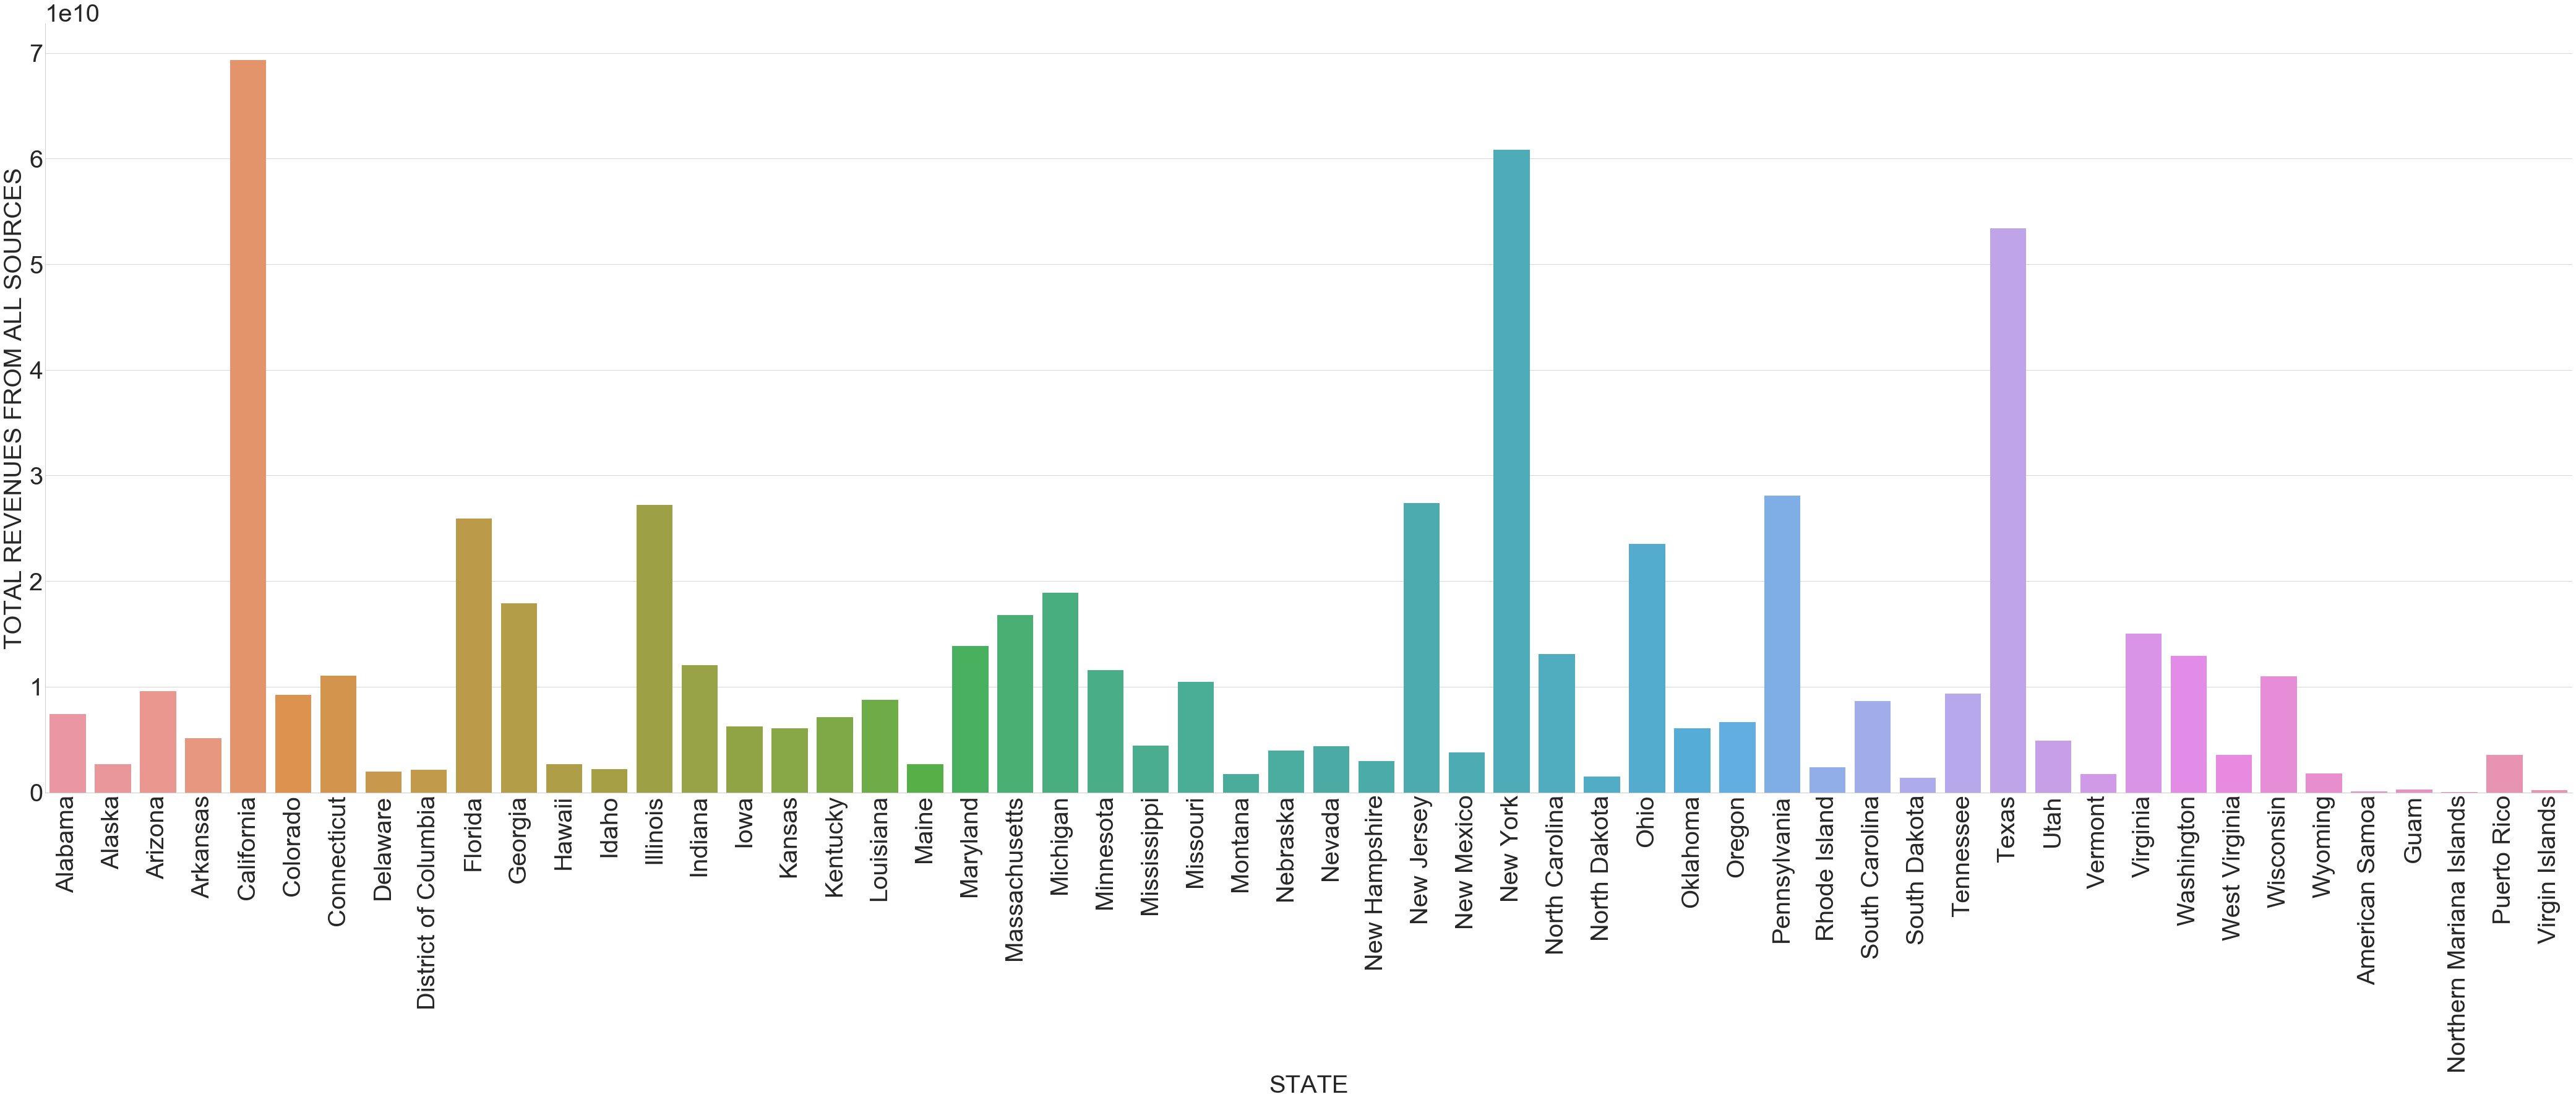

In [93]:
# bar graphhhhhhhh of state and total revenue
sns.factorplot(data=renamed_df, x='STATE', y='TOTAL REVENUES FROM ALL SOURCES', kind='bar', size=20, aspect=3)
sns.set_style("whitegrid")
plt.xticks(rotation=90)
plt.rc('font', size=40)
plt.show()

### Teen Pregnancy Rate by State ###

In [64]:
# import super janky csv
#https://www.cdc.gov/nchs/pressroom/sosmap/teen-births/teenbirths.htm
# birth rate is (number of births) x 1000 / estimated population at mid-year
preg_data = os.path.join('TEENBIRTHS2016.csv')
preg_data_df = pd.read_csv(preg_data)
preg_data_df.head()

,STATE,RATE,URL
0,AL,28.4,/nchs/pressroom/states/alabama/alabama.htm
1,AK,25.8,/nchs/pressroom/states/alaska/alaska.htm
2,AZ,23.6,/nchs/pressroom/states/arizona/arizona.htm
3,AR,34.6,/nchs/pressroom/states/arkansas/arkansas.htm
4,CA,17.0,/nchs/pressroom/states/california/california.htm


/Users/abigailvasquez/anaconda3/envs/PythonData/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


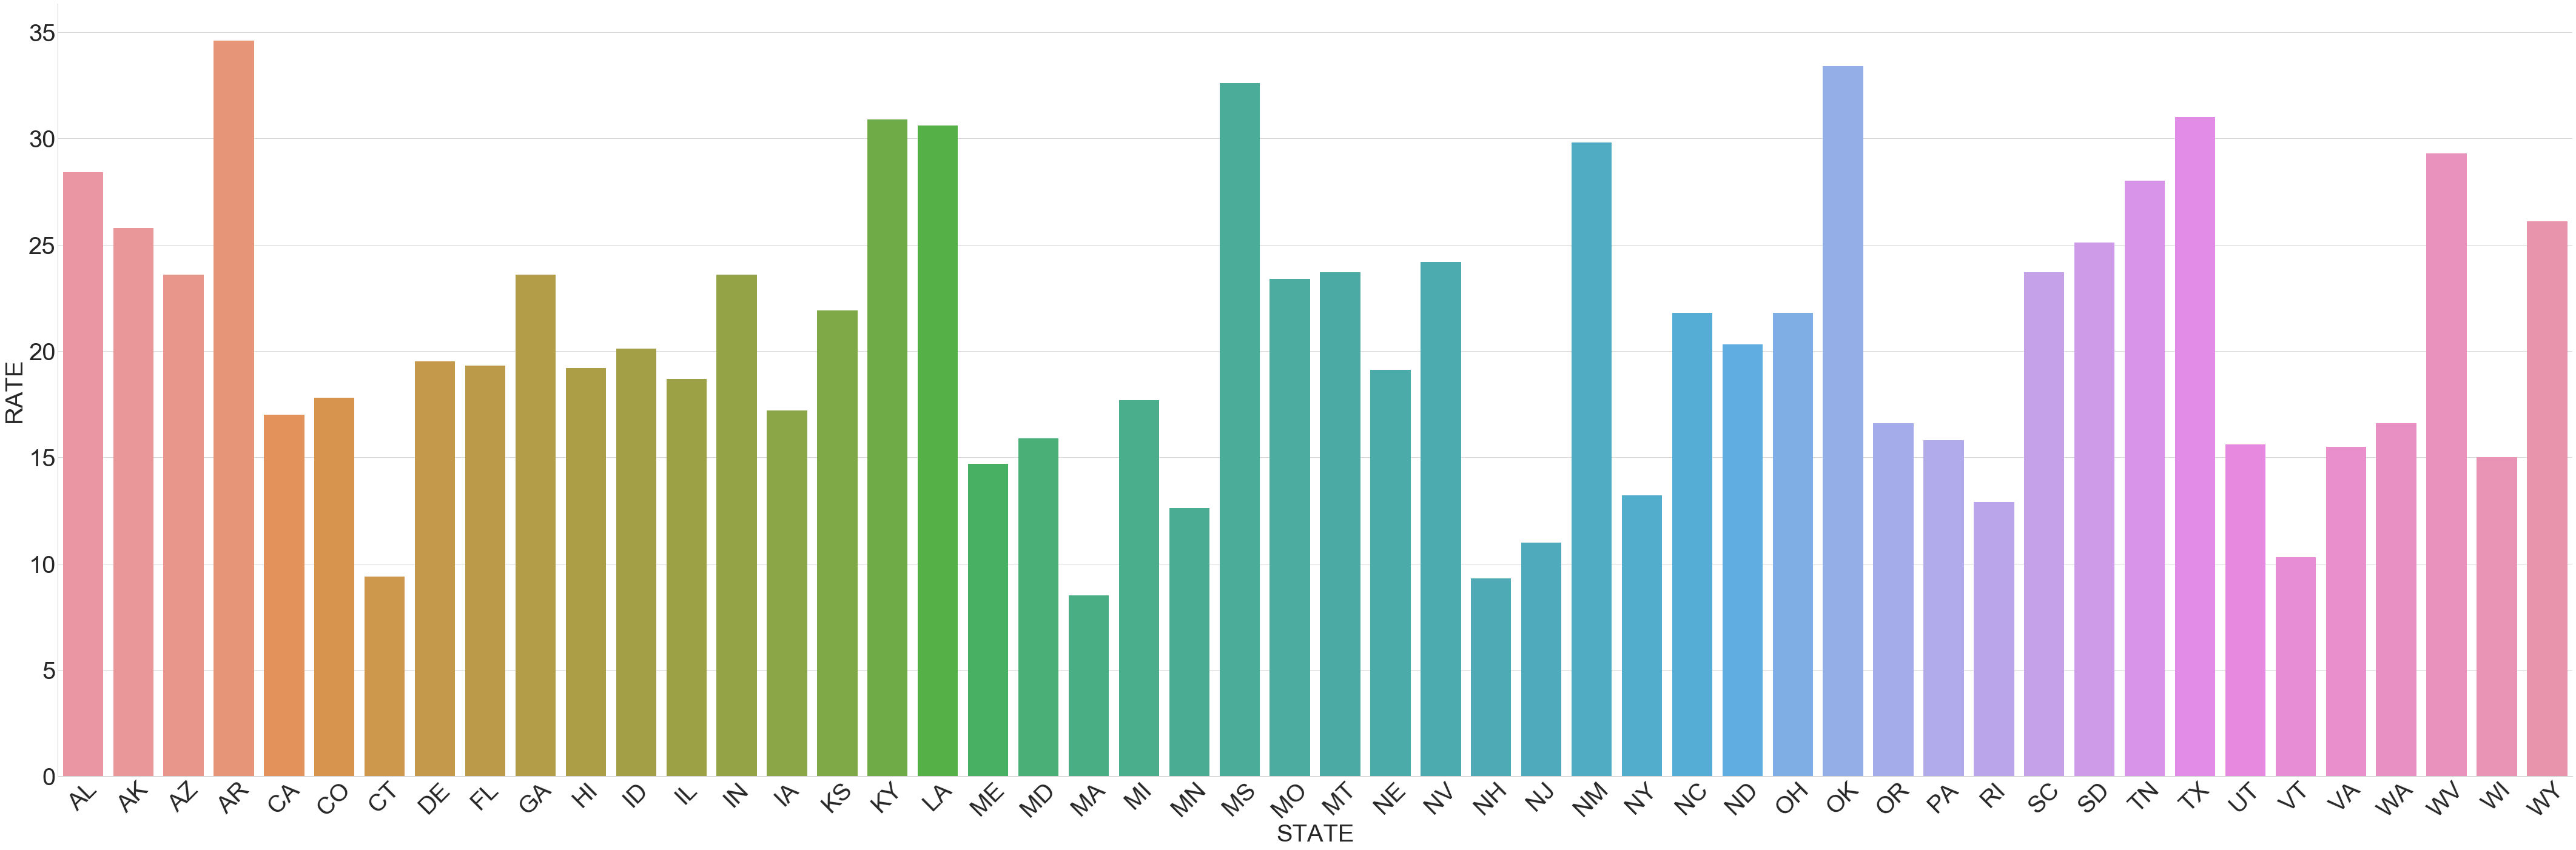

In [74]:
sns.factorplot(data=preg_data_df, x='STATE', y='RATE', kind='bar', size=20, aspect=3)
sns.set_style("whitegrid")
plt.xticks(rotation=45)
plt.rc('font', size=40)
plt.show()